<a href="https://colab.research.google.com/github/jhbellingrath/CS-290-Classwork/blob/main/notebooks/gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/survey%20lung%20cancer.csv')

In [85]:
target="LUNG_CANCER"

In [86]:
attributes=df.columns[df.columns!=target]
attributes=attributes.drop("AGE")
attributes

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [87]:
# entropy function for qualitative
def entropy(data,attribute):
  entropy = 0
  total = len( data )
  vals = data[attribute].unique()
  for val in vals:
    counts = len(data[ data[attribute] == val ])
    weight = counts / total
    props = data[ data[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))
  return entropy

In [88]:
# Gini function
def gini(df,attribute):
  impurities=[]
  vals=df[attribute].unique()
  for val in vals:
    impurity=0
    impurity_left=1
    weight=len(df[df[attribute]>=val])/len(df)
    counts=(df[df[attribute]>=val][target].value_counts())
    for count in counts.array:
      impurity_left-=((count/(len(df)*weight))**2)
    impurity+=impurity_left*weight
    impurity_right=1
    weight=len(df[df[attribute]<val])/len(df)
    counts=(df[df[attribute]<val][target].value_counts())
    for count in counts.array:
      impurity_right-=((count/(len(df)*weight))**2)
    impurity+=impurity_right*weight
    impurities.append([impurity,val])
  impurities.sort()
  return impurities[0][0]

In [89]:
#  entropy for a quantitative variable
def entropy_quantitative(attribute):
  entropies=[]
  total = len(df)
  vals = df[attribute].unique()
  for val in vals:
    entropy_value = 0
    # Left split
    left = df[df[attribute] <= val][[attribute, target]]
    props = left[target].value_counts(normalize=True)
    weight = len(left) / total
    for prop in props.array:
      entropy_value -= weight * prop * math.log2(prop)

    # Right split
    right = df[df[attribute] > val][[attribute, target]]
    props = right[target].value_counts(normalize=True)
    weight = len(right) / total
    for prop in props.array:
      entropy_value -= weight * prop * math.log2(prop)

    entropies.append([entropy_value,val])
  entropies.sort()
  return entropies[0]
  #returns a list of [entropy value,split value]

In [90]:
def Attribute_selection_method(data,task,target,impurity_measure):
  attributes=data.columns[data.columns!=target]
  if task=="classification":
    if impurity_measure=="entropy":
      entropies=[]
      for attribute in attributes:
        if len(data[attribute].unique())<5:
          entropies.append([entropy(data,attribute),attribute])
        else:
          entropies.append(entropy_quantitative(attribute))
      entropies.sort()
      return "The best attribute is "+entropies[0][1]
    if impurity_measure=="gini":
      ginis=[]
      for attribute in attributes:
        ginis.append([gini(data,attribute),attribute])
      ginis.sort()
      return "The best attribute is "+ginis[0][1]
  if task=="regression":
    X = data.drop(columns=[target]) #new dataset that doesnt have price
    y = data[target].values # target varibale into numpy array
    best_overall_mse = float('inf') #same as when i did this earleir
    best_attribute = None #also same
    for column in X.columns: #goes through each attribute in x
        value, mse = best_split(X[column].values, y) #calls best split to find best split on current column
        if mse < best_overall_mse:#durp durp durp durp durp duhhhhhhhhh
            best_overall_mse = mse
            best_attribute = column
    return "The best attribute is "+best_attribute


In [108]:
Attribute_selection_method(df,"classification",target,"entropy")

'The best attribute is ALLERGY '

In [93]:
# LabelEncoder
le = LabelEncoder()

In [94]:
# target variable
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])

In [95]:
# Compare
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [96]:
# Iterate over all columns in X
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is object
        X[col] = le.fit_transform(X[col])  # Fit and transform

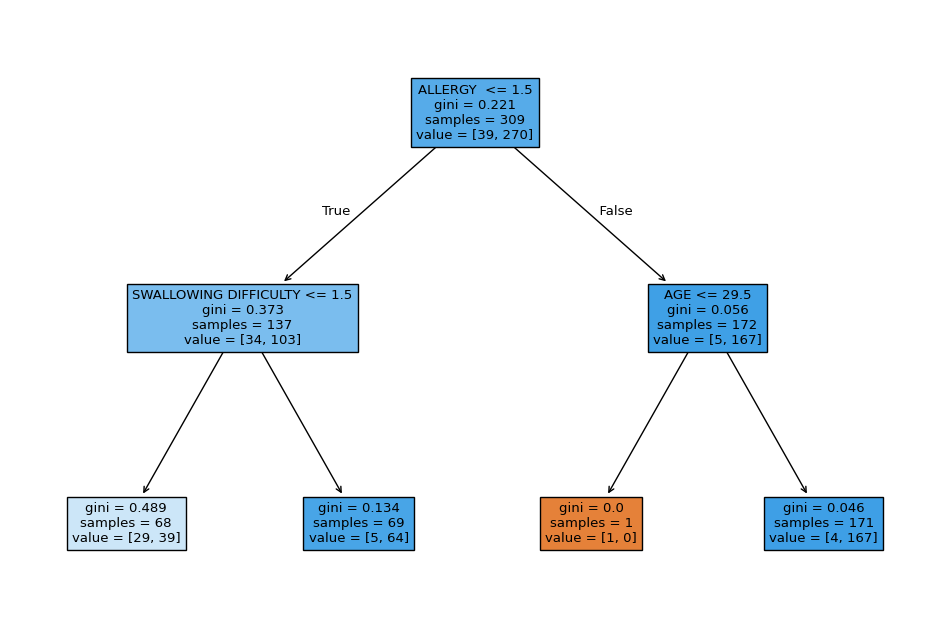

In [97]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X, y)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [98]:
# Get the first split attribute
first_split_attribute = X.columns[clf.tree_.feature[0]]
print("First attribute chosen by DecisionTreeClassifier:", first_split_attribute)

First attribute chosen by DecisionTreeClassifier: ALLERGY 


In [99]:
df2=pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv')

In [100]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008
1,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007
2,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010
3,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007
4,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979


In [101]:
target2 = "price"

In [102]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
#mean squared error function
#difference between the predicted and actual values
#calculates the mean squared error
#np mean is the average of all the squares

In [103]:
def best_split(attribute, target):
    unique_values = np.unique(attribute) #get all unique vals from attribute
    best_mse = float('inf') #positive infinity to store lowest mse so far
    best_value = None #stores the lowest mse overall

In [104]:
def best_split(attribute, target):
    unique_values = np.unique(attribute) #get all unique vals from attribute
    best_mse = float('inf') #positive infinity to store lowest mse so far
    best_value = None #stores the lowest mse overall

    for value in unique_values:#goes through eah unique value
        left_mask = attribute <= value #boolean mask is true when attribute is <= current value
        right_mask = attribute > value #opposite of the other one duh

        if np.any(left_mask) and np.any(right_mask): #makes sure there is one point left and right
            y_left = target[left_mask] #gets the target vals that match the data in the left
            y_right = target[right_mask] #the opposite
            mse = (mean_squared_error(y_left, y_left.mean()) * len(y_left) +
                   mean_squared_error(y_right, y_right.mean()) * len(y_right)) / len(target)
            #cal the weighted avg for the split, did it for left and right and then combione them based on num of datapoints in each subset
            if mse < best_mse:
                best_mse = mse
                best_value = value

    return best_value, best_mse

In [105]:
task = "regression"
#define the task

In [109]:
Attribute_selection_method(df2,"regression",target2,"gini")

'The best attribute is sqft_living'

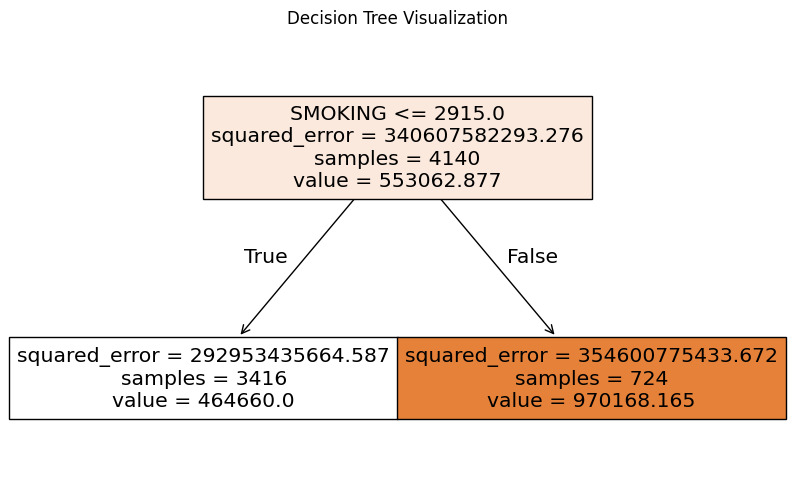

In [106]:
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()